# TP1
Disclaimer: las imágenes de cv.imread por defecto son BGR. Pyplot.imshow asume RGB, por eso se ven invertidos sus canales y los nombres de los archivos pueden parecer errados.
## Parte 1
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo de White Patch para librarnos de las diferencias de color de iluminación
3. Mostrar los resultados obtenidos y analizar posibles fallas (si las hubiere) en el caso de White Patch.

In [4]:
# Common libraries
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
# Set image repo
ImgFolder = "..\\..\\Material_TPs\\TP1\\"

### 1. Implementar algotimo de pasaje a coordenadas crómáticas.
Busco pasar de BGR a HSL.

In [6]:
img = cv.imread(ImgFolder + "coord_cromaticas\\CoordCrom_1.png")

In [7]:
# De cv.imread, los canales son [B,G,R]
def bgr2hsv(img):
    if(type(img) is not np.ndarray): 
        raise TypeError("Only usable on numpy tensors")
    if((len(img.shape) < 3) or (img.dtype!='uint8')):
        raise TypeError("Only usable on 8-bit RGB images")
    img = (img / 255.0).astype('float64')
    M_idx = np.argmax(img,axis=2)
    V_channel = np.max(img,axis=2)
    m = np.min(img,axis=2)
    m_idx = np.argmin(img,axis=2)
    S_channel = np.divide((V_channel - m),V_channel, where = V_channel!=0, out = np.zeros_like(V_channel).astype('float64'))
    H_channel = np.zeros_like(S_channel)
    # Using np.spacing(1) to get almost 0 to avoid erros in the division.
    # If blue is max
    H_channel[M_idx == 0] = (60.0 * (4  + ((img[...,2] - img[...,1])/(V_channel - m + np.spacing(1)))))[M_idx == 0]
    # If green is max
    H_channel[M_idx == 1] = (60.0 * (2  + ((img[...,0] - img[...,2])/(V_channel - m + np.spacing(1)))))[M_idx == 1]
    # If reed is max
    H_channel[M_idx == 2] = (60.0 * (0  + ((img[...,1] - img[...,0])/(V_channel - m + np.spacing(1)))))[M_idx == 2]
    H_channel[M_idx == m_idx] = np.zeros(H_channel[M_idx == m_idx].shape)
    H_channel[H_channel<0] = (H_channel+360)[H_channel<0]
    hsv = np.zeros(img.shape)
    # Convert to destination data type assuming RGB 8-bit
    hsv[:,:,0] = H_channel/2.0
    hsv[:,:,1] = S_channel*255.0
    hsv[:,:,2] = V_channel*255.0
    return hsv.astype('uint8')

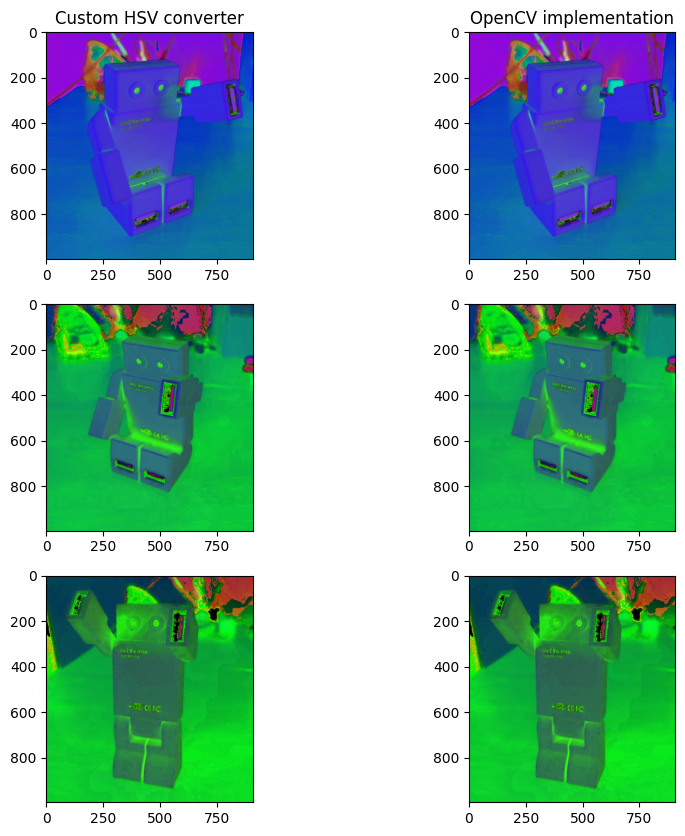

In [8]:
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].imshow(bgr2hsv(img))
ax[0,1].imshow(cv.cvtColor(img, cv.COLOR_BGR2HSV))
ax[0,0].set_title('Custom HSV converter')
ax[0,1].set_title('OpenCV implementation')
ax[1,0].imshow(bgr2hsv(cv.imread(ImgFolder + "coord_cromaticas\\CoordCrom_2.png")))
ax[1,1].imshow(cv.cvtColor(cv.imread(ImgFolder + "coord_cromaticas\\CoordCrom_2.png"), cv.COLOR_BGR2HSV))
ax[2,0].imshow(bgr2hsv(cv.imread(ImgFolder + "coord_cromaticas\\CoordCrom_3.png")))
ax[2,1].imshow(cv.cvtColor(cv.imread(ImgFolder + "coord_cromaticas\\CoordCrom_3.png"), cv.COLOR_BGR2HSV))

### 2. Implementar algotimo de White Patch

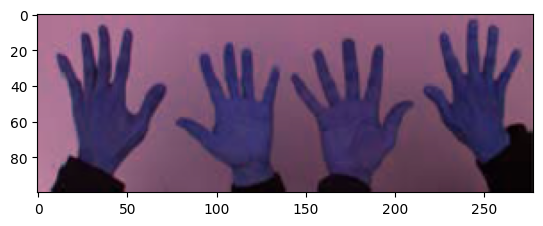

In [9]:
img = cv.imread(ImgFolder + "white_patch\\test_blue.png")
plt.imshow(img)

In [10]:
def whitePatch(img):
    if(type(img) is not np.ndarray): 
        raise TypeError("Only usable on numpy tensors")
    if((len(img.shape) < 3) or (img.dtype!='uint8')):
        raise TypeError("Only usable on 8-bit RGB images")
    r_max = np.max(img[:,:,2])
    g_max = np.max(img[:,:,1])
    b_max = np.max(img[:,:,0])
    img[:,:,2] = (img[:,:,2])*((float(255)/r_max))
    img[:,:,1] = (img[:,:,1])*((float(255)/g_max))
    img[:,:,0] = (img[:,:,0])*((float(255)/b_max))
    return img.astype('uint8')

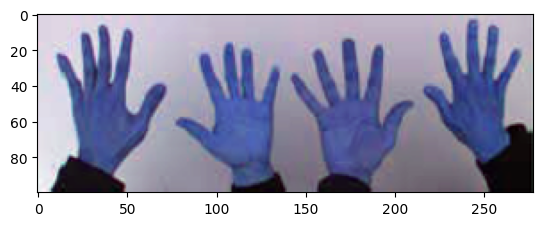

In [11]:
plt.imshow(whitePatch(img))

### 3. Resultados

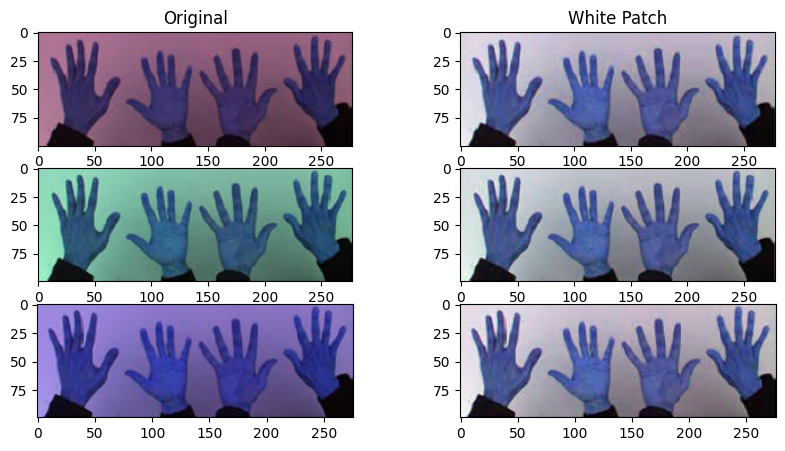

In [12]:
wpFolder = ImgFolder + 'white_patch\\'
fig, ax = plt.subplots(3,2,figsize=(10,5))
ax[0,0].set_title('Original')
ax[0,1].set_title('White Patch')
ax[0,0].imshow((cv.imread(wpFolder + 'test_blue.png')))
ax[0,1].imshow(whitePatch(cv.imread(wpFolder + 'test_blue.png')))
ax[1,0].imshow((cv.imread(wpFolder + 'test_green.png')))
ax[1,1].imshow(whitePatch(cv.imread(wpFolder + 'test_green.png')))
ax[2,0].imshow((cv.imread(wpFolder + 'test_red.png')))
ax[2,1].imshow(whitePatch(cv.imread(wpFolder + 'test_red.png')))


White-patch correctamente rescata los colores originales al asumir que el máximo de cada canal corresponde al blanco puro, y ajustando el resto de los píxeles acorde.

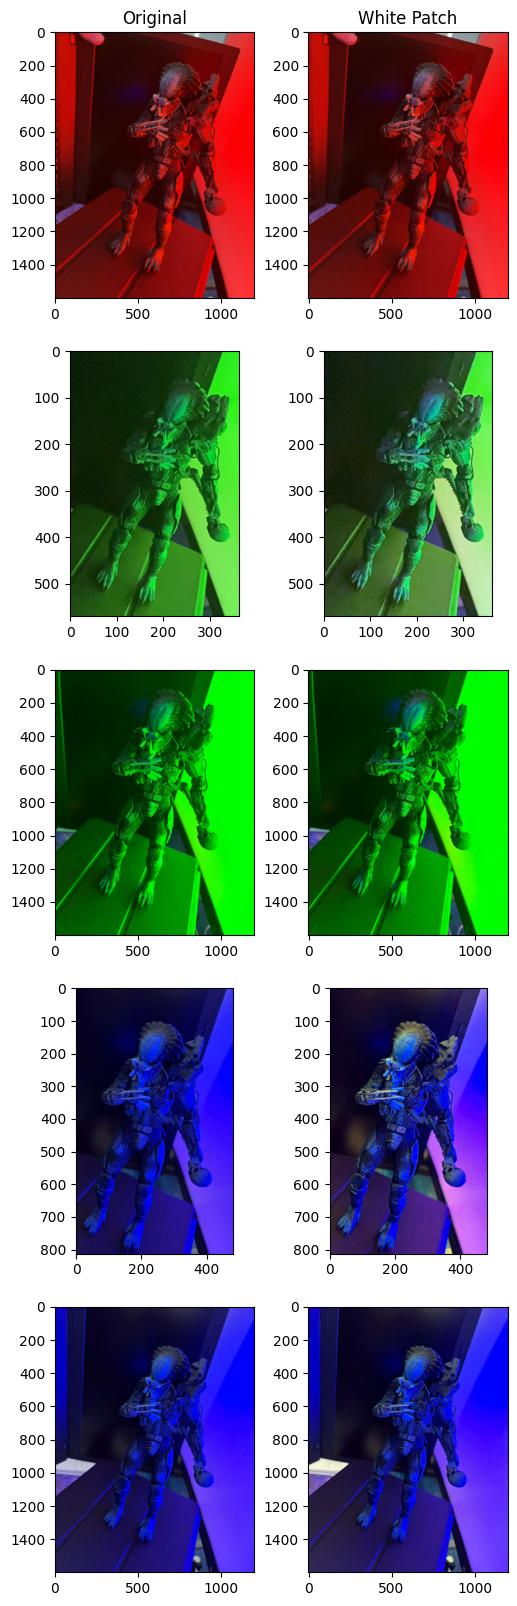

In [13]:
wpFolder = ImgFolder + 'white_patch\\'
fig, ax = plt.subplots(5,2,figsize=(6,20))
ax[0,0].set_title('Original')
ax[0,1].set_title('White Patch')
ax[0,0].imshow((cv.imread(wpFolder + 'wp_blue.jpg')))
ax[0,1].imshow(whitePatch(cv.imread(wpFolder + 'wp_blue.jpg')))
ax[1,0].imshow((cv.imread(wpFolder + 'wp_green.png')))
ax[1,1].imshow(whitePatch(cv.imread(wpFolder + 'wp_green.png')))
ax[2,0].imshow((cv.imread(wpFolder + 'wp_green2.jpg')))
ax[2,1].imshow(whitePatch(cv.imread(wpFolder + 'wp_green2.jpg')))
ax[3,0].imshow((cv.imread(wpFolder + 'wp_red.png')))
ax[3,1].imshow(whitePatch(cv.imread(wpFolder + 'wp_red.png')))
ax[4,0].imshow((cv.imread(wpFolder + 'wp_red2.jpg')))
ax[4,1].imshow(whitePatch(cv.imread(wpFolder + 'wp_red2.jpg')))

Si consideramos que las imagenes queden practicamente iguales una falla, entonces el algoritmo erra en el caso de las imágenes en formato .jpg. 

In [14]:
img = cv.imread(wpFolder + 'wp_red2.jpg')
print("Max red is", np.max(img[:,:,2]))
print("Max green is", np.max(img[:,:,1]))
print("Max blue is", np.max(img[:,:,0]))

Max red is 255
Max green is 201
Max blue is 203


In [15]:
img = cv.imread(wpFolder + 'wp_red.png')
print("Max red is", np.max(img[:,:,2]))
print("Max green is", np.max(img[:,:,1]))
print("Max blue is", np.max(img[:,:,0]))

Max red is 255
Max green is 134
Max blue is 122


En el caso extremo de que haya píxeles blanco puro (255,255,255) en la imagen, mirando la formula nos damos rapidamente cuenta que White-Patch no hace nada. El algoritmo se hace menos eficiente en su corrección a medida que haya píxeles más cercanos al blanco puro, lo que tiene sentido porque implicaría que la imagen no está uniformemente iluminada por la misma luz. White-patch, en estos casos, no es lo suficientemente complejo para balancear los blancos. 

En las imágenes anteriores, las que no gozaron de una corrección tienen píxeles blancos, o cercanos, de porciones de la escena que no fueron "contaminadas" por la iluminación externa.

## Parte 2
### 1. Leer imagenes en escala de grises

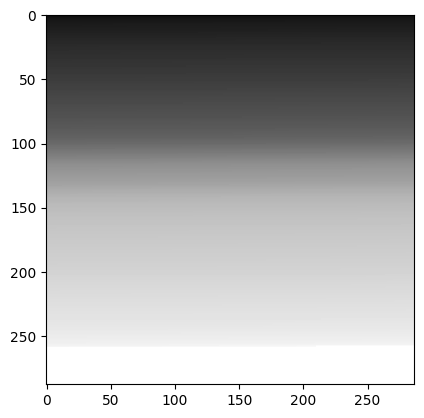

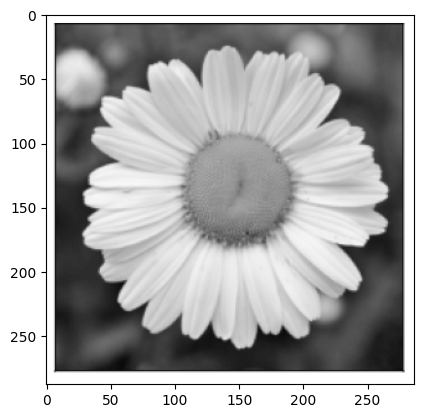

In [16]:
img1 = cv.imread(ImgFolder + 'img1_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.show()
img2 = cv.imread(ImgFolder + 'img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.show()

### 2. Histogramas

Text(0, 0.5, 'Cantidad de pixeles')

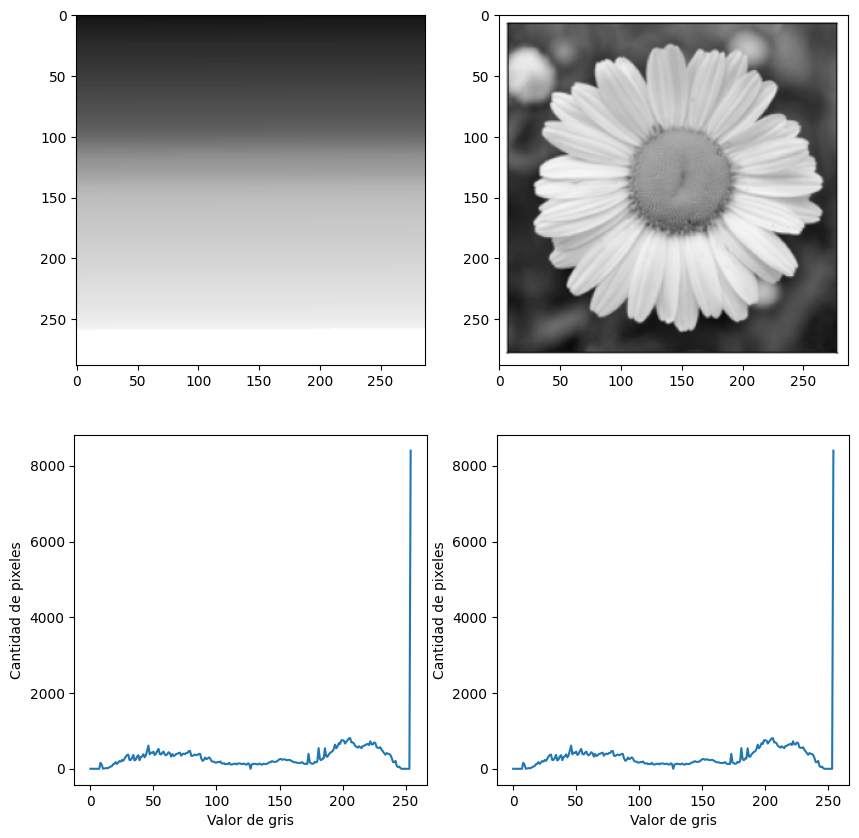

In [17]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
hist1,bins1 = np.histogram(img1.ravel(),255)
hist2,bins2 = np.histogram(img2.ravel(),255)
ax[0,0].imshow(img1,cmap='gray')
ax[0,1].imshow(img2,cmap='gray')
ax[1,0].plot(hist1)
ax[1,0].set_xlabel('Valor de gris')
ax[1,0].set_ylabel('Cantidad de pixeles')
ax[1,1].plot(hist2)
ax[1,1].set_xlabel('Valor de gris')
ax[1,1].set_ylabel('Cantidad de pixeles')


El histograma simplemente cuenta la cantidad de píxeles que hay para cada valor de gris. En este caso, las imágenes son completamente distintas pero coinciden exactamente en esas cantidades. Los histogramas son una buena forma de entender la distribución de colores de una imagen, pero de ninguna forma describen formas ni patrones. En un algoritmo de clasificación de imágenes no tiene sentido, pero puede ser útil para otras cosas.

### 3. Segmentación de una imagen

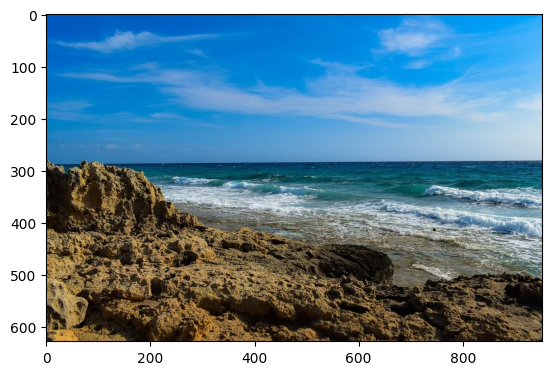

In [18]:
seg = cv.imread(ImgFolder + 'segmentacion.png')
plt.imshow(cv.cvtColor(seg,cv.COLOR_BGR2RGB))

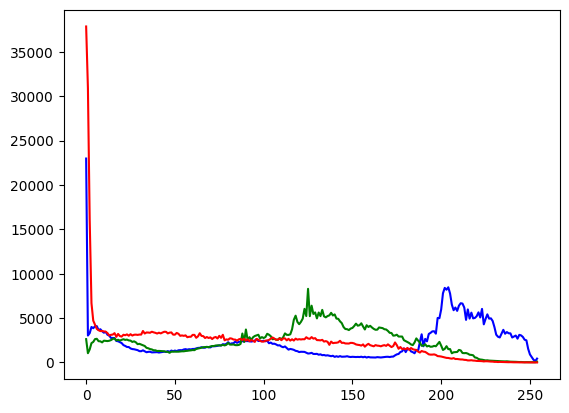

In [19]:
hist_blue,bins = np.histogram(seg[:,:,0].ravel(),255)
hist_green,bins = np.histogram(seg[:,:,1].ravel(),255)
hist_red,bins = np.histogram(seg[:,:,2].ravel(),255)
plt.plot(hist_blue, color='blue')
plt.plot(hist_green, color='green')
plt.plot(hist_red, color='red')

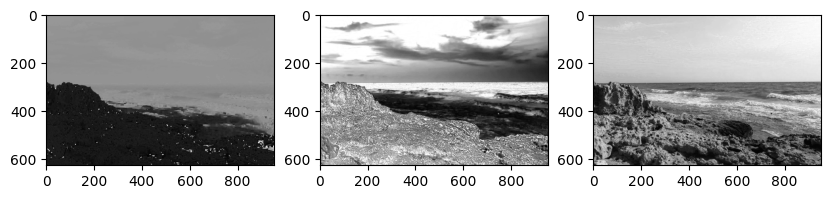

In [20]:
segHSV = cv.cvtColor(seg,cv.COLOR_BGR2HSV)
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0].imshow(segHSV[:,:,0], cmap='gray')
ax[1].imshow(segHSV[:,:,1], cmap='gray')
ax[2].imshow(segHSV[:,:,2], cmap='gray')

Con el matiz se ve bastante claro la diferencia con las piedras. Por otro lado, en el valor se distingue bastante bien el cielo del mar. Obtengo 1 muestra por cada feature: tierra, cielo y agua. 

Text(0.5, 1.0, 'agua')

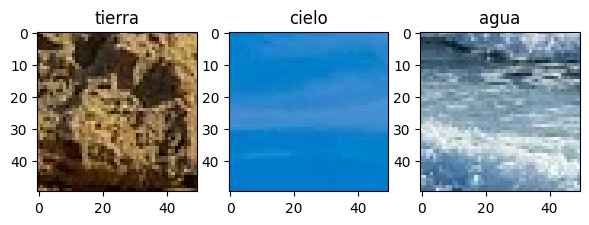

In [21]:
fig, ax = plt.subplots(1,3,figsize=(7,5))
tierra = segHSV[500:550,150:200,:]
cielo = segHSV[100:150,150:200,:]
agua = segHSV[350:400,800:850,:]
ax[0].imshow(cv.cvtColor(tierra,cv.COLOR_HSV2RGB))
ax[0].set_title('tierra')
ax[1].imshow(cv.cvtColor(cielo,cv.COLOR_HSV2RGB))
ax[1].set_title('cielo')
ax[2].imshow(cv.cvtColor(agua,cv.COLOR_HSV2RGB))
ax[2].set_title('agua')

In [30]:
def getTemplate(img: np.ndarray,size: list[int], center: list[int], hsv: bool, spread = 3.0):
    if(hsv): img = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    bottom = (np.array(center) - (np.array(size)/2).round()).clip(0,np.array(img[:,:,0].shape)).astype('uint')
    top = (np.array(center) + (np.array(size)/2).round()).clip(0,np.array(img[:,:,0].shape)).astype('uint')
    dx = slice(bottom[0],top[0])
    dy = slice(bottom[1],top[1])
    template = img[dx,dy,:]
    mean = np.mean(template, axis=(0,1))
    low = (mean - spread*np.std(template, axis=(0,1))).clip(0,np.iinfo(img.dtype).max)
    high = (mean + spread*np.std(template, axis=(0,1))).clip(0,np.iinfo(img.dtype).max)
    return template,low.astype(img.dtype),high.astype(img.dtype)

In [29]:
def display3channels(img):
    fig, ax = plt.subplots(1,3,figsize=(10,5))
    ax[0].imshow(img[:,:,0], cmap='gray')
    ax[1].imshow(img[:,:,1], cmap='gray')
    ax[2].imshow(img[:,:,2], cmap='gray')
    plt.show()
    return

Extraigo muestras de las diferentes características y luego busco el resto de los píxeles que coinciden con la media de color en HSV, más/menos un múltiplo del desvío estandard. Es un método sencillo muy manual que no funciona del todo bien.

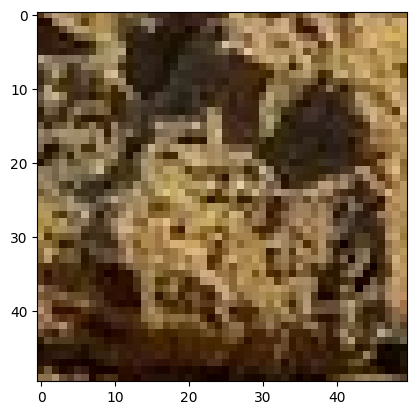

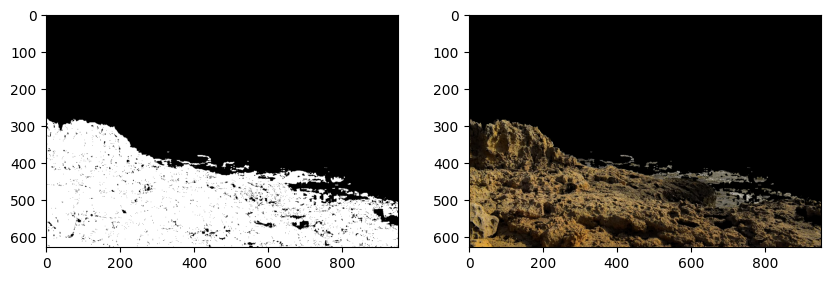

In [31]:
tierra, low, high = getTemplate(seg,[50,50],[525,175],True)
land_mask = cv.inRange(segHSV, low,  high)
img_land = cv.bitwise_and(segHSV, segHSV, mask=land_mask)
plt.imshow(cv.cvtColor(tierra, cv.COLOR_HSV2RGB))
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(land_mask,cmap='gray')
ax[1].imshow(cv.cvtColor(img_land, cv.COLOR_HSV2RGB))


Las piedras y demás funcionaron bastante bien. Ahora intento encontrar las otras dos de una imagen sin lo anterior.

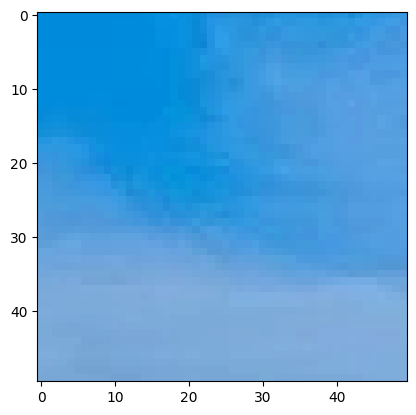

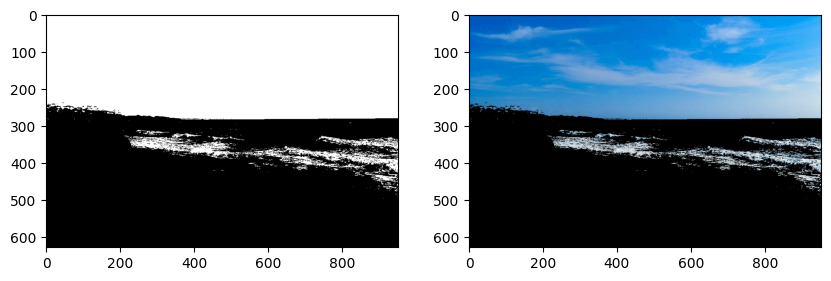

In [32]:
img_noland = segHSV - img_land
cielo, low, high = getTemplate(seg,[50,50],[150,500],True,spread=10)
sky_mask = cv.inRange(img_noland, low,  high)
img_sky = cv.bitwise_and(segHSV, segHSV, mask=sky_mask)
plt.imshow(cv.cvtColor(cielo, cv.COLOR_HSV2RGB))
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sky_mask,cmap='gray')
ax[1].imshow(cv.cvtColor(img_sky, cv.COLOR_HSV2RGB))

Era de esperarse que falle un poco con la espuma del mar. Ahora, como se que el resto es agua, simplemente invierto todo.

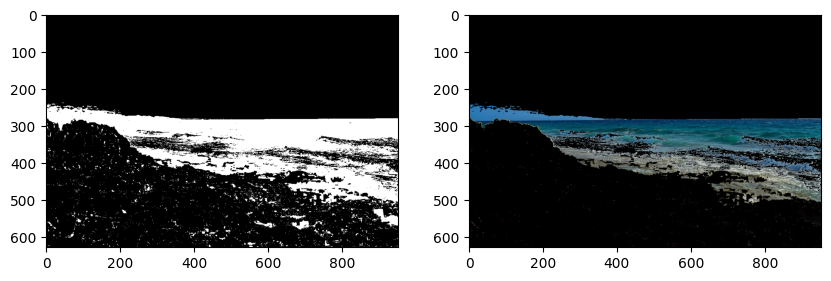

In [33]:
water_mask = cv.bitwise_not(sky_mask)
water_mask = water_mask - land_mask
img_water = cv.bitwise_and(segHSV, segHSV, mask=water_mask)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(water_mask,cmap='gray')
ax[1].imshow(cv.cvtColor(img_water, cv.COLOR_HSV2RGB))